<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/mfia/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga de datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd


# Definir los símbolos de Yahoo Finance, incluyendo General Electric y Visa
symbols = {
    'USD/JPY': 'JPY=X',
    'EUR/USD': 'EURUSD=X',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'Pfizer': 'PFE',
    'Nvidia': 'NVDA',
    'Tesla': 'TSLA',
    'General Electric': 'GE',
    'Visa': 'V'
}

# Descargar los datos de todos los símbolos
data = yf.download(list(symbols.values()), period="max")

# Filtrar para quedarnos solo con la columna 'Adj Close'
df = data['Close'].dropna()

# Nombres inteligibles
symbol_renames = {v: k for k, v in symbols.items()} # diccionario inverso
df = df.rename(columns=symbol_renames)
df = df.pct_change().dropna()
# Añadir una columna con el día de la semana
df["Date"] = df.index
filtro_fecha = df.Date.dt.year >= 2011
df = df[filtro_fecha]
df["Year"] = df.Date.dt.year
df['Day_of_Week'] = df['Date'].dt.day_name()

# Guardar los datos en un archivo CSV si es necesario
#df.to_csv('close_varios.csv', index=False)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed


Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-01-03,0.023444,0.004261,-0.000546,0.017476,-0.004381,0.027273,0.009709,-0.000375,0.001990,2011-01-03,2011,Monday
2011-01-04,0.004288,-0.000080,0.018052,-0.003690,0.006743,-0.003161,0.017534,0.001878,0.001134,2011-01-04,2011,Tuesday
2011-01-05,0.013026,-0.002678,0.001612,0.011543,0.004506,0.076728,0.006670,0.005999,0.021105,2011-01-05,2011,Wednesday
2011-01-06,-0.008324,-0.012328,-0.004292,0.007273,0.014030,0.138398,0.003866,0.039135,0.014982,2011-01-06,2011,Thursday
2011-01-07,-0.001991,-0.013447,-0.007005,0.004792,0.001334,0.027936,0.008801,0.012912,-0.002870,2011-01-07,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.010389,-0.004355,0.010944,-0.014046,0.000716,-0.011594,0.012153,-0.004985,-0.012375,2025-05-23,2025,Friday
2025-05-27,0.025026,0.009452,0.038619,0.026295,-0.008362,0.032066,0.012436,0.069399,0.016292,2025-05-27,2025,Tuesday
2025-05-28,-0.006310,-0.004512,0.007817,-0.003123,0.010669,-0.005092,-0.018213,-0.016506,0.001197,2025-05-28,2025,Wednesday


### Información básica

In [37]:
df.shape

(3617, 13)

In [38]:
df.columns

Index(['Amazon', 'EUR/USD', 'General Electric', 'Alphabet', 'USD/JPY',
       'Nvidia', 'Pfizer', 'Tesla', 'Visa', 'Date', 'Year', 'Day_of_Week',
       'Am-Al'],
      dtype='object', name='Ticker')

In [39]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2025-05-16', '2025-05-19', '2025-05-20', '2025-05-21',
               '2025-05-22', '2025-05-23', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30'],
              dtype='datetime64[ns]', name='Date', length=3617, freq=None)

## Seleccion de columnas por nombre

In [5]:
# seleccionar columna
df.Amazon

,Amazon
Date,
2011-01-03,0.023444
2011-01-04,0.004288
2011-01-05,0.013026
2011-01-06,-0.008324
2011-01-07,-0.001991
...,...
2025-05-23,-0.010389
2025-05-27,0.025026
2025-05-28,-0.006310


In [6]:
# otra forma de seleccionar columna
df["EUR/USD"]

,EUR/USD
Date,
2011-01-03,0.004261
2011-01-04,-0.000080
2011-01-05,-0.002678
2011-01-06,-0.012328
2011-01-07,-0.013447
...,...
2025-05-23,-0.004355
2025-05-27,0.009452
2025-05-28,-0.004512


### Buscar máximo

In [7]:
# máximo incremento
df["EUR/USD"].max()

0.03175612356587054

In [10]:
df["EUR/USD"].idxmax()

Timestamp('2013-07-11 00:00:00')

### Buscar por índice (nombre de la fila)

In [12]:
df.loc[ df["EUR/USD"].idxmax() ]

,2013-07-11
Ticker,
Amazon,0.025074
EUR/USD,0.031756
General Electric,0.016992
Alphabet,0.015729
USD/JPY,-0.025723
Nvidia,0.01386
Pfizer,0.011603
Tesla,0.027317
Visa,0.017461


In [14]:
# acceso por índice
df.loc["2025-05-27"]

,2025-05-27
Ticker,
Amazon,0.025026
EUR/USD,0.009452
General Electric,0.038619
Alphabet,0.026295
USD/JPY,-0.008362
Nvidia,0.032066
Pfizer,0.012436
Tesla,0.069399
Visa,0.016292


<Axes: xlabel='Date'>

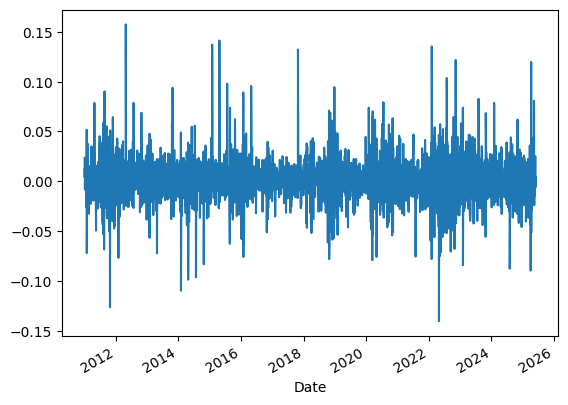

In [15]:
df.Amazon.plot()

In [16]:
# por índice
df.loc["2025-05-27","Amazon"]

np.float64(0.025026113945093353)

### Buscar por posición

In [17]:
# por posición
df.iloc[0,0]

np.float64(0.023444493611653572)

### Las filas y columnas son "Series"

Series: array de numpy con índice

In [18]:
# datos de año
df.loc["2025-05-30"]

,2025-05-30
Ticker,
Amazon,-0.003354
EUR/USD,0.01042
General Electric,0.007167
Alphabet,-0.000698
USD/JPY,-0.011503
Nvidia,-0.029169
Pfizer,0.001706
Tesla,-0.033396
Visa,0.007699


In [19]:
df.iloc[-1]

,2025-05-30
Ticker,
Amazon,-0.003354
EUR/USD,0.01042
General Electric,0.007167
Alphabet,-0.000698
USD/JPY,-0.011503
Nvidia,-0.029169
Pfizer,0.001706
Tesla,-0.033396
Visa,0.007699


In [20]:
# última fila, todas las columnas salvo las 3 últimas
df.iloc[-1, 0:-3 ]

,2025-05-30
Ticker,
Amazon,-0.003354
EUR/USD,0.01042
General Electric,0.007167
Alphabet,-0.000698
USD/JPY,-0.011503
Nvidia,-0.029169
Pfizer,0.001706
Tesla,-0.033396
Visa,0.007699


In [21]:
type(df.iloc[-1, 0:-3 ])

pandas.core.series.Series

In [26]:
import numpy as np

a = np.array([30,10,50])

b = a*5

In [27]:
print(b)

[150  50 250]


In [28]:
a[0] = 10
print("a",a)
print("b",b)

a [10 10 50]
b [150  50 250]


In [30]:
df.iloc[-1, 0:-3 ]*100

,2025-05-30
Ticker,
Amazon,-0.335441
EUR/USD,1.042002
General Electric,0.716743
Alphabet,-0.069821
USD/JPY,-1.150339
Nvidia,-2.916874
Pfizer,0.170571
Tesla,-3.339565
Visa,0.76987


### Fila nueva

In [32]:
df["Am-Al"] = df["Amazon"] - df["Alphabet"]
df

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week,Am-Al
Date,,,,,,,,,,,,,
2011-01-03,0.023444,0.004261,-0.000546,0.017476,-0.004381,0.027273,0.009709,-0.000375,0.001990,2011-01-03,2011,Monday,0.005969
2011-01-04,0.004288,-0.000080,0.018052,-0.003690,0.006743,-0.003161,0.017534,0.001878,0.001134,2011-01-04,2011,Tuesday,0.007978
2011-01-05,0.013026,-0.002678,0.001612,0.011543,0.004506,0.076728,0.006670,0.005999,0.021105,2011-01-05,2011,Wednesday,0.001484
2011-01-06,-0.008324,-0.012328,-0.004292,0.007273,0.014030,0.138398,0.003866,0.039135,0.014982,2011-01-06,2011,Thursday,-0.015597
2011-01-07,-0.001991,-0.013447,-0.007005,0.004792,0.001334,0.027936,0.008801,0.012912,-0.002870,2011-01-07,2011,Friday,-0.006783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.010389,-0.004355,0.010944,-0.014046,0.000716,-0.011594,0.012153,-0.004985,-0.012375,2025-05-23,2025,Friday,0.003657
2025-05-27,0.025026,0.009452,0.038619,0.026295,-0.008362,0.032066,0.012436,0.069399,0.016292,2025-05-27,2025,Tuesday,-0.001269
2025-05-28,-0.006310,-0.004512,0.007817,-0.003123,0.010669,-0.005092,-0.018213,-0.016506,0.001197,2025-05-28,2025,Wednesday,-0.003187


<Axes: xlabel='Date'>

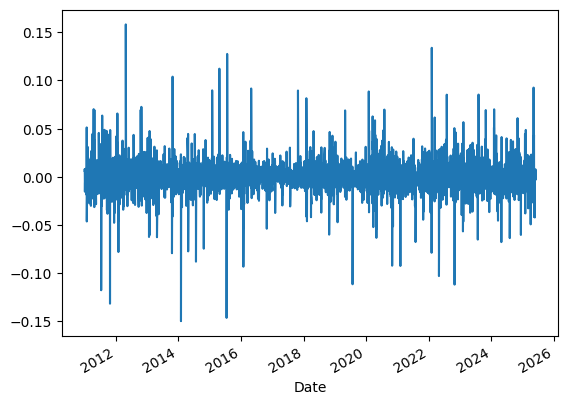

In [33]:
df["Am-Al"].plot()

### Filtros

In [43]:
filtro = df.Year == 2025
df2025 = df[filtro]

<Axes: xlabel='Date'>

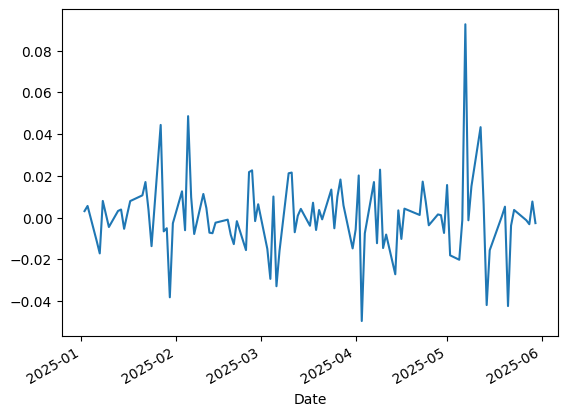

In [44]:
df2025["Am-Al"].plot()

In [50]:
df2025

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week,Am-Al
Date,,,,,,,,,,,,,
2025-01-02,0.003783,-0.005217,0.010792,0.000687,0.004612,0.029935,0.003015,-0.060816,-0.005189,2025-01-02,2025,Thursday,0.003097
2025-01-03,0.018027,-0.008081,0.019989,0.012458,-0.002263,0.044538,-0.000752,0.082156,0.001622,2025-01-03,2025,Friday,0.005569
2025-01-06,0.015255,0.003617,0.002849,0.026487,0.000756,0.034332,0.011282,0.001486,-0.005938,2025-01-06,2025,Monday,-0.011232
2025-01-07,-0.024164,0.007862,-0.000812,-0.007010,0.001664,-0.062170,0.008925,-0.040603,-0.004376,2025-01-07,2025,Tuesday,-0.017154
2025-01-08,0.000090,-0.003931,0.003366,-0.007878,0.003125,-0.000214,-0.009952,0.001471,0.002984,2025-01-08,2025,Wednesday,0.007968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.010389,-0.004355,0.010944,-0.014046,0.000716,-0.011594,0.012153,-0.004985,-0.012375,2025-05-23,2025,Friday,0.003657
2025-05-27,0.025026,0.009452,0.038619,0.026295,-0.008362,0.032066,0.012436,0.069399,0.016292,2025-05-27,2025,Tuesday,-0.001269
2025-05-28,-0.006310,-0.004512,0.007817,-0.003123,0.010669,-0.005092,-0.018213,-0.016506,0.001197,2025-05-28,2025,Wednesday,-0.003187


In [47]:
# índice correspondiente a la fila en la que "Am-Al" toma el valor máximo
df2025["Am-Al"].idxmax()

Timestamp('2025-05-07 00:00:00')

In [48]:
df2025.loc[ df2025["Am-Al"].idxmax() ]

,2025-05-07
Ticker,
Amazon,0.019999
EUR/USD,0.002597
General Electric,0.006328
Alphabet,-0.072597
USD/JPY,-0.004309
Nvidia,0.031002
Pfizer,-0.003933
Tesla,0.00316
Visa,0.006184


<Axes: xlabel='Date'>

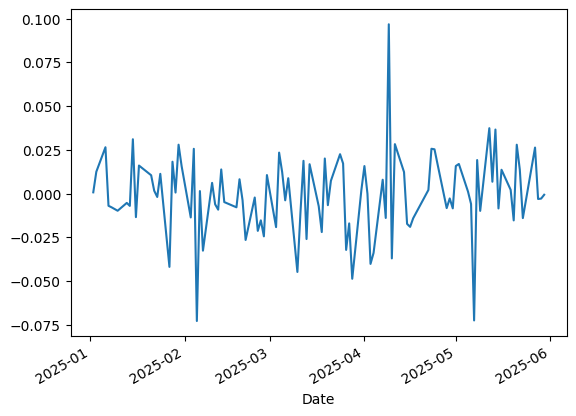

In [49]:
df2025.Alphabet.plot()